In [ ]:

import copy

import numpy as np
from numpy import nan
import scipy as sp
import sklearn as sk

import pandas as pd

import math as m # math stuff
import random as rd #always good to have
import matplotlib.pyplot as plt #plots.


import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import functools as ft

import itertools
import os

import sys
if sys.version_info[0] < 3:
    from StringIO import StringIO
else:
    from io import StringIO

np.random.seed(1234)
print("Import finished, \nhere's a random number:",rd.random(),"\nIf the number changed, the cell ran correctly. ")

Import finished, 
here's a random number: 0.11966657961414606 
If the number changed, the cell ran correctly. 


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/')

os.chdir("/content/gdrive//MyDrive/SIMS") # change to your directory
print("The path is:", os.getcwd() )
print("All the files are: ",os.listdir())

Mounted at /content/gdrive/
The path is: /content/gdrive/MyDrive/SIMS
All the files are:  ['testAlleleData', 'RR_Gain.csv', 'RR_Gain_STD.xlsx.gsheet', 'RR_Gain_STD.csv', 'RRBLUP_Gain.png']


LINE PLOTS: Gain, Model Performance, Variance

Gain


In [ ]:
startList = [1,7,13,19]

results = pd.read_csv("RR_Gain.csv")
results = results.drop(results[results['Gen']=='Variety'].index)


allYs = list()
x_lab = [" ","C1"," "," "," "," "," "," "," ","C2"," "," "," "," "," "," ","C3"," "," "," "," "," "," "]
x = list(range(0,23))
for dims in startList:
  y = results.iloc[:,dims:dims+6]
  allYs.append(y)

std = pd.read_csv("RR_Gain_STD.csv")
std = std.drop(std[std['Gen']=='Variety'].index)

allSTD = list()
for dims in startList:
  y = std.iloc[:,dims:dims+6]
  allSTD.append(y)


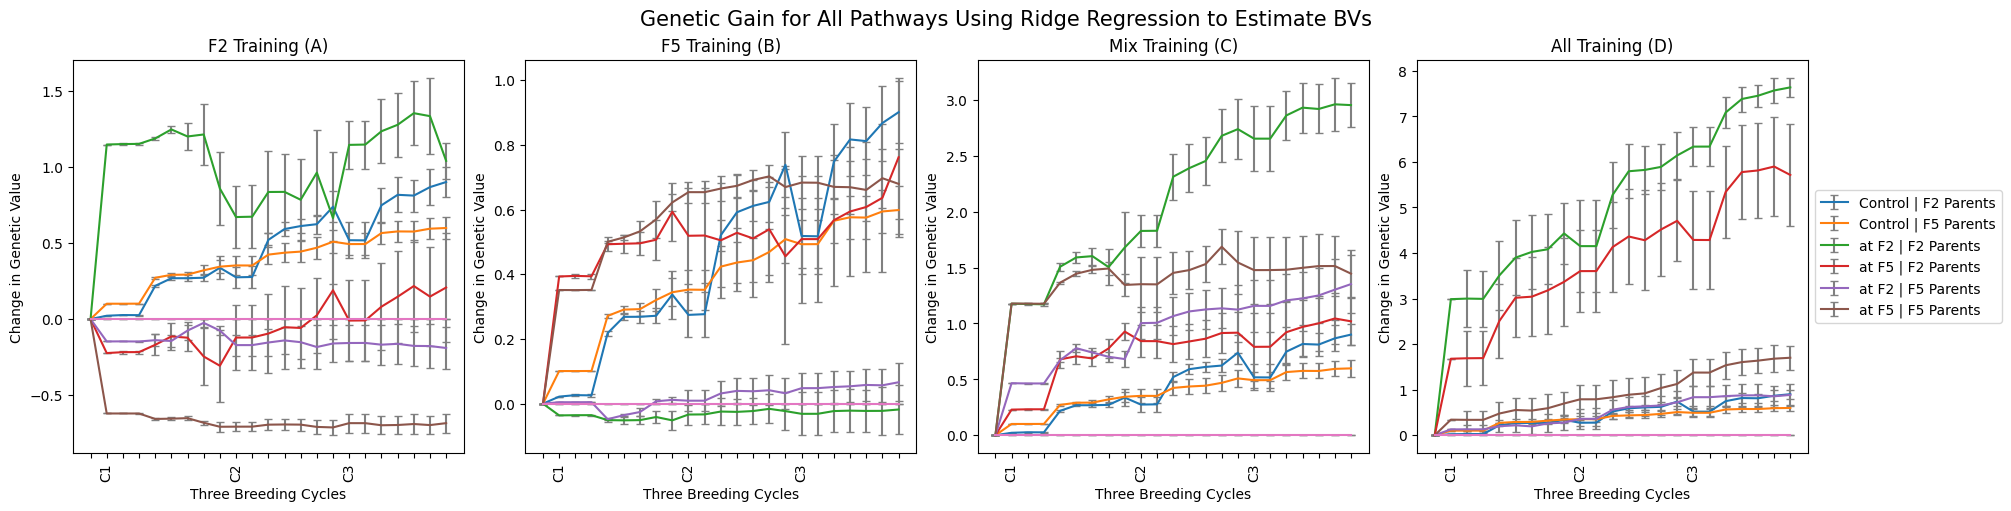

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
labels = ["F2 Training (A)","F5 Training (B)","Mix Training (C)","All Training (D)"]
sublabels = ["Control | F2 Parents","Control | F5 Parents","at F2 | F2 Parents","at F5 | F2 Parents","at F2 | F5 Parents","at F5 | F5 Parents"]
x = np.array(x)
x = x.flatten()

fig, axs = plt.subplots(1,4,figsize=(20, 5),layout='constrained')
fig.suptitle('Genetic Gain for All Pathways Using Ridge Regression to Estimate BVs', fontsize=15)

for trn in range(0,4):
  fig = plt.figure()
  y = pd.DataFrame(allYs[trn])
  y['axis'] = float(0)
  std = pd.DataFrame(allSTD[trn])
  std['axis'] = float(0)
  yerr = pd.DataFrame(std)
  for i in range(0,7):
    axs[trn].errorbar(x, y.iloc[:,i], yerr = yerr.iloc[:,i], capsize=3,ecolor = "gray") #plot every line with error bars one by one
    if trn == 3 :
      axs[trn].legend(sublabels,loc='center left', bbox_to_anchor=(1, 0.5))
    axs[trn].set_title(labels[trn]) #set title
    axs[trn].set_xticks(x, labels=x_lab,rotation=90) #change x-axis labels
    axs[trn].set_ylabel("Change in Genetic Value") # y label
    axs[trn].set_xlabel("Three Breeding Cycles") # y label


plt.show()


PCC

In [ ]:
startList = [1,5,9,13]

results = pd.read_csv("RR_PCC.csv")
results = results.drop(results[results['Gen']=='Variety'].index)


allYs = list()
x_lab = ["C1"," "," "," "," "," "," ","C2"," "," "," "," "," "," ","C3"," "," "," "," "," "," "]
x = list(range(0,21))
for dims in startList:
  y = results.iloc[:,dims:dims+6]
  allYs.append(y)

std = pd.read_csv("RR_PCC_STD.csv")
std = std.drop(std[std['Gen']=='Variety'].index)

allSTD = list()
for dims in startList:
  y = std.iloc[:,dims:dims+6]
  allSTD.append(y)

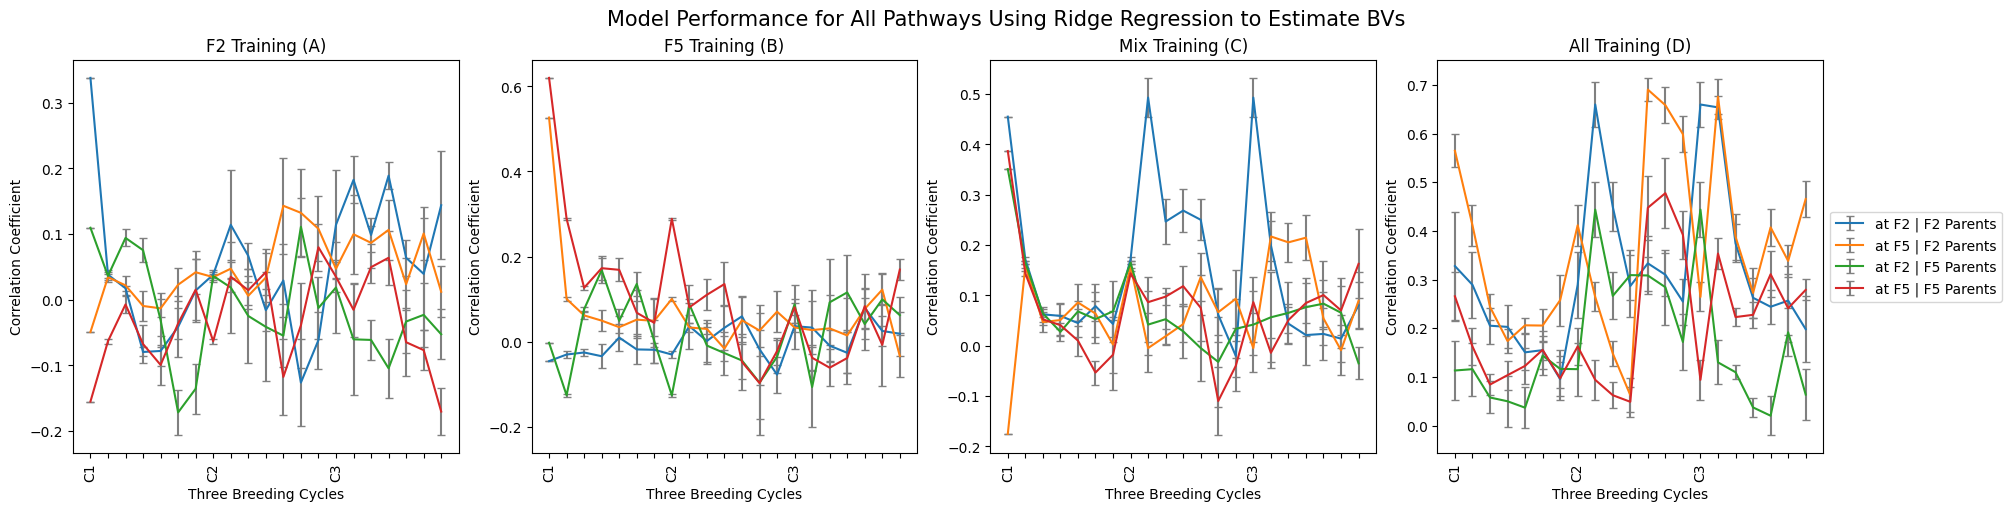

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
labels = ["F2 Training (A)","F5 Training (B)","Mix Training (C)","All Training (D)"]
sublabels = ["at F2 | F2 Parents","at F5 | F2 Parents","at F2 | F5 Parents","at F5 | F5 Parents"]
x = np.array(x)
x = x.flatten()

fig, axs = plt.subplots(1,4,figsize=(20, 5),layout='constrained')
fig.suptitle('Model Performance for All Pathways Using Ridge Regression to Estimate BVs', fontsize=15)

for trn in range(0,4):
  fig = plt.figure()
  y = pd.DataFrame(allYs[trn])
  y['axis'] = float(0)
  std = pd.DataFrame(allSTD[trn])
  std['axis'] = float(0)
  yerr = pd.DataFrame(std)
  for i in range(0,4):
    axs[trn].errorbar(x, y.iloc[:,i], yerr = yerr.iloc[:,i], capsize=3,ecolor = "gray") #plot every line with error bars one by one
    if trn == 3 :
      axs[trn].legend(sublabels,loc='center left', bbox_to_anchor=(1, 0.5))
    axs[trn].set_title(labels[trn]) #set title
    axs[trn].set_xticks(x, labels=x_lab,rotation=90) #change x-axis labels
    axs[trn].set_ylabel("Correlation Coefficient") # y label
    axs[trn].set_xlabel("Three Breeding Cycles") # y label


plt.show()

Variance

In [ ]:
startList = [1,7,13,19]

results = pd.read_csv("RR_Variance.csv")
results = results.drop(results[results['Gen']=='Variety'].index)


allYs = list()
x_lab = ["C1"," "," "," "," "," "," "," ","C2"," "," "," "," "," "," "," ","C3"," "," "," "," "," "," "," "]
x = list(range(0,24))
for dims in startList:
  y = results.iloc[:,dims:dims+6]
  allYs.append(y)

std = pd.read_csv("RR_Variance_STD.csv")
std = std.drop(std[std['Gen']=='Variety'].index)

allSTD = list()
for dims in startList:
  y = std.iloc[:,dims:dims+6]
  allSTD.append(y)



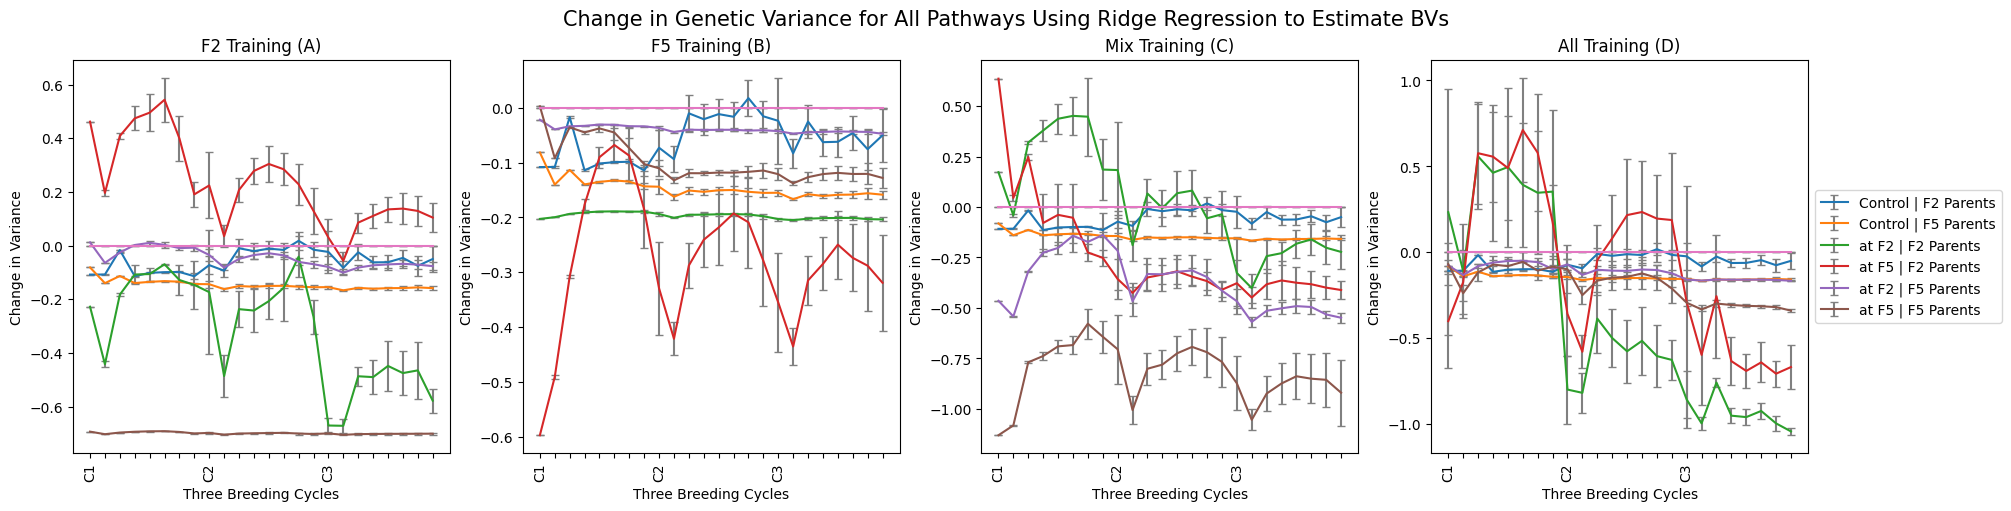

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
labels = ["F2 Training (A)","F5 Training (B)","Mix Training (C)","All Training (D)"]
sublabels = ["Control | F2 Parents","Control | F5 Parents","at F2 | F2 Parents","at F5 | F2 Parents","at F2 | F5 Parents","at F5 | F5 Parents"]
x = np.array(x)
x = x.flatten()

fig, axs = plt.subplots(1,4,figsize=(20, 5),layout='constrained')
fig.suptitle('Change in Genetic Variance for All Pathways Using Ridge Regression to Estimate BVs', fontsize=15)

for trn in range(0,4):
  fig = plt.figure()
  y = pd.DataFrame(allYs[trn])
  y['axis'] = float(0)
  std = pd.DataFrame(allSTD[trn])
  std['axis'] = float(0)
  yerr = pd.DataFrame(std)
  for i in range(0,7):
    axs[trn].errorbar(x, y.iloc[:,i], yerr = yerr.iloc[:,i], capsize=3,ecolor = "gray") #plot every line with error bars one by one
    if trn == 3 :
      axs[trn].legend(sublabels,loc='center left', bbox_to_anchor=(1, 0.5))
    axs[trn].set_title(labels[trn]) #set title
    axs[trn].set_xticks(x, labels=x_lab,rotation=90) #change x-axis labels
    axs[trn].set_ylabel("Change in Variance") # y label
    axs[trn].set_xlabel("Three Breeding Cycles") # y label


plt.show()



PLOTTING ALLELE FREQUENCIES

In [ ]:
!pip install pyreadr
import pyreadr


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.9/440.9 kB 5.8 MB/s eta 0:00:00


take .rds containing genotypes and convert to pandas df

In [ ]:

import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
pandas2ri.activate()

readRDS = robjects.r['readRDS']
df = readRDS('testAlleleData/C1testAlleles.rds')
df = pandas2ri.rpy2py_dataframe(df)

